# PyData NYC, 2014
#### Author: [Greg Reda](http://www.gregreda.com) ([@gjreda](https://twitter.com/gjreda))
#### Topic: Translating SQL to pandas
#### Date: 2014-11-22

In [82]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)

## Reading data

### CSV

In [4]:
# this would be a huge pain to load into a database
mo = pd.read_csv('data/mariano-rivera.csv')
mo.tail()

,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB,Awards
14,2009,39,NYY,AL,3,3,0.500,1.76,66,0,55,0,0,44,66.1,48,14,13,7,12,1,72,1,0,1,257,262,0.905,6.5,0.9,1.6,9.8,6.00,ASMVP-14
15,2010,40,NYY,AL,3,3,0.500,1.80,61,0,55,0,0,33,60.0,39,14,12,2,11,3,45,5,0,0,230,241,0.833,5.9,0.3,1.7,6.8,4.09,AS
16,2011,41,NYY,AL,1,2,0.333,1.91,64,0,54,0,0,44,61.1,47,13,13,3,8,2,60,2,0,1,233,226,0.897,6.9,0.4,1.2,8.8,7.50,ASCYA-8
17,2012,42,NYY,AL,1,1,0.500,2.16,9,0,9,0,0,5,8.1,6,2,2,0,2,2,8,0,0,0,32,203,0.960,6.5,0.0,2.2,8.6,4.00,NaN
18,2013,43,NYY,AL,6,2,0.750,2.11,64,0,60,0,0,44,64.0,58,16,15,6,9,3,54,1,0,0,256,192,1.047,8.2,0.8,1.3,7.6,6.00,AS


### URL

pandas can fetch data from a URL ...

In [5]:
clean = lambda s: s.replace('$', '')[:-1] if '.' in s else s.replace('$', '') # a lot going on here
url = 'https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv'
sandwiches = pd.read_table(url, sep='\t', converters={'price': lambda s: float(clean(s))})
sandwiches.head(3)

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
0,1,BLT,Old Oak Tap,The B is applewood smoked&mdash;nice and snapp...,10.0,2109 W. Chicago Ave.,Chicago,773-772-0406,theoldoaktap.com,"2109 W. Chicago Ave., Chicago","2109 West Chicago Avenue, Chicago, IL 60622, USA",41.895734,-87.679960
1,2,Fried Bologna,Au Cheval,Thought your bologna-eating days had retired w...,9.0,800 W. Randolph St.,Chicago,312-929-4580,aucheval.tumblr.com,"800 W. Randolph St., Chicago","800 West Randolph Street, Chicago, IL 60607, USA",41.884672,-87.647754
2,3,Woodland Mushroom,Xoco,Leave it to Rick Bayless and crew to come up w...,9.5,445 N. Clark St.,Chicago,312-334-3688,rickbayless.com,"445 N. Clark St., Chicago","445 North Clark Street, Chicago, IL 60654, USA",41.890602,-87.630925


### JSON

In [4]:
gh = pd.read_json('https://api.github.com/repos/pydata/pandas/issues?per_page=3')
gh[['body', 'created_at', 'title', 'url']].head(3)

,body,created_at,title,url
0,,2014-11-22 02:54:48,DOC: Add where and mask to API doc,https://api.github.com/repos/pydata/pandas/iss...
1,Related to #7979\r\n\r\nBecause `Index` is no ...,2014-11-22 02:16:30,API: Index.duplicated() should return `np.arra...,https://api.github.com/repos/pydata/pandas/iss...
2,I'm not sure if this is supported or not -- it...,2014-11-21 19:49:36,HDF corrupts data when using complib='blosc:zlib',https://api.github.com/repos/pydata/pandas/iss...


You'll likely need to do some parsing though - pandas `read_json` doesn't do well with nested JSON yet

### Clipboard

Possibly my favorite way to read data into pandas ...

In [9]:
clip = pd.read_clipboard(sep=",") # I copied a csv and used the sep argument from read_table
clip.head()

,P,AB,BC,BA,CB,AC,CA
0,51,70,45,66,30,44,30
1,52,75,83,70,64,12,40
2,53,92,90,100,50,17,0
3,54,82,83,58,67,44,73
4,55,80,55,60,27,38,25


### SQL Database

In [10]:
# All of this is basically the same as it would be with Postgres, MySQL, or any other database
# Just pass pandas a connection object and it'll take care of the rest.
from pandas.io import sql
import sqlite3
conn = sqlite3.connect('data/towed.db')
query = "SELECT * FROM towed"
towed = sql.read_sql(query, con=conn, parse_dates={'date':'%m/%d/%Y'})
towed.head()

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
0,2014-11-18,FORD,LL,,BLK,S105053,IL,10300 S. Doty,(773) 568-8495,2750424
1,2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129
2,2014-11-18,CHRY,VN,,SIL,V847641,IL,701 N. Sacramento,(773) 265-7605,6798366
3,2014-11-18,HYUN,4D,,SIL,N756530,IL,400 E. Lower Wacker,(312) 744-7550,917127
4,2014-11-18,TOYT,4D,,WHI,K702211,IL,400 E. Lower Wacker,(312) 744-7550,917128


We're going to work with the towed dataset for a bit.

### Inspecting

We've already been using `.head()`, but there's also `.tail()`. You can also use standard Python slicing.

In [11]:
towed[100:105]

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
100,2014-11-18,FORD,4D,,SIL,B9455,NB,10300 S. Doty,(773) 568-8495,2750400
101,2014-11-18,BMW,4D,,WHI,V960806,IL,400 E. Lower Wacker,(312) 744-7550,917087
102,2014-11-18,DODG,PK,TK,RED,1382871B,IL,10300 S. Doty,(773) 568-8495,2750398
103,2014-11-18,CHEV,4D,,TAN,V356714,IL,10300 S. Doty,(773) 568-8495,2750397
104,2014-11-18,BUIC,4D,,WHI,S941660,IL,10300 S. Doty,(773) 568-8495,2750396


In [12]:
towed.info() # empty string showing up as non-null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 10 columns):
date              5065 non-null datetime64[ns]
make              5065 non-null object
style             5065 non-null object
model             5065 non-null object
color             5065 non-null object
plate             5065 non-null object
state             5065 non-null object
towed_to          5065 non-null object
facility_phone    5065 non-null object
inventory_num     5065 non-null int64
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 395.8+ KB


In [9]:
mo.info() # note the nulls in the Awards column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 34 columns):
Year      19 non-null int64
Age       19 non-null int64
Tm        19 non-null object
Lg        19 non-null object
W         19 non-null int64
L         19 non-null int64
W-L%      19 non-null float64
ERA       19 non-null float64
G         19 non-null int64
GS        19 non-null int64
GF        19 non-null int64
CG        19 non-null int64
SHO       19 non-null int64
SV        19 non-null int64
IP        19 non-null float64
H         19 non-null int64
R         19 non-null int64
ER        19 non-null int64
HR        19 non-null int64
BB        19 non-null int64
IBB       19 non-null int64
SO        19 non-null int64
HBP       19 non-null int64
BK        19 non-null int64
WP        19 non-null int64
BF        19 non-null int64
ERA+      19 non-null int64
WHIP      19 non-null float64
H/9       19 non-null float64
HR/9      19 non-null float64
BB/9      19 non-null float64
SO/9      19 

In [13]:
mo.describe() # basic stats for any numeric column

,Year,Age,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2004.000000,34.000000,4.315789,3.157895,0.570158,2.222105,58.684211,0.526316,50.105263,0.0,0.0,34.315789,67.315789,52.526316,17.894737,16.578947,3.736842,15.052632,2.157895,61.736842,2.421053,0.157895,0.684211,268.578947,222.157895,0.998684,6.994737,0.489474,1.994737,8.142105,4.870000
std,5.627314,5.627314,2.083070,1.462994,0.174293,0.918861,17.023032,2.294157,19.944074,0.0,0.0,15.198877,18.657506,15.886292,8.305920,8.064434,2.423086,8.140937,1.500487,24.250641,1.894899,0.374634,0.749269,75.045405,56.108291,0.171747,1.107787,0.328117,0.779939,1.403296,2.553853
min,1995.000000,25.000000,1.000000,0.000000,0.200000,1.380000,9.000000,0.000000,2.000000,0.0,0.0,0.000000,8.100000,6.000000,2.000000,2.000000,0.000000,2.000000,0.000000,8.000000,0.000000,0.000000,0.000000,32.000000,84.000000,0.665000,5.200000,0.000000,0.800000,5.300000,1.700000
25%,1999.500000,29.500000,3.000000,2.000000,0.500000,1.800000,61.000000,0.000000,51.500000,0.0,0.0,31.500000,62.550000,45.000000,14.000000,13.000000,2.500000,10.500000,1.000000,51.500000,1.000000,0.000000,0.000000,251.000000,192.000000,0.901000,6.300000,0.300000,1.300000,6.900000,3.350000
50%,2004.000000,34.000000,4.000000,3.000000,0.571000,1.910000,64.000000,0.000000,57.000000,0.0,0.0,39.000000,70.200000,58.000000,16.000000,14.000000,3.000000,12.000000,2.000000,60.000000,2.000000,0.000000,1.000000,277.000000,233.000000,0.994000,6.900000,0.400000,2.100000,8.000000,4.090000
75%,2008.500000,38.500000,6.000000,4.000000,0.651500,2.250000,66.000000,0.000000,60.500000,0.0,0.0,44.000000,75.100000,63.000000,21.000000,19.000000,4.500000,19.000000,3.000000,73.000000,4.000000,0.000000,1.000000,303.500000,254.500000,1.070500,7.600000,0.600000,2.400000,9.250000,6.085000
max,2013.000000,43.000000,8.000000,6.000000,1.000000,5.510000,74.000000,10.000000,69.000000,0.0,0.0,53.000000,107.200000,73.000000,43.000000,41.000000,11.000000,34.000000,6.000000,130.000000,6.000000,1.000000,2.000000,425.000000,316.000000,1.507000,9.500000,1.500000,4.000000,10.900000,12.830000


### Indexes

In [14]:
towed.set_index('date', inplace=True)

In [15]:
# SELECT *
# FROM towed
# WHERE date = '2014-11-04'
# LIMIT 5;
towed.ix['2014-11-04']

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244
2014-11-04,FORD,SW,,SIL,S860992,IL,10300 S. Doty,(773) 568-8495,2749362
2014-11-04,DODG,VN,,RED,571R990,IL,701 N. Sacramento,(773) 265-7605,6797239
2014-11-04,DODG,PK,TK,BRO,1381812,IL,10300 S. Doty,(773) 568-8495,2749364
2014-11-04,ZCZY,2D,,BRO,,IL,10300 S. Doty,(773) 785-9752,1714849


In [16]:
towed.ix['2014-11-04', 'make'] # get a Series back (or individual values, if unique)

date
2014-11-04    LINC
2014-11-04    CHRY
2014-11-04    PLYM
2014-11-04    CHEV
2014-11-04    CHEV
2014-11-04    FORD
2014-11-04    DODG
2014-11-04    DODG
2014-11-04    ZCZY
2014-11-04    CHEV
2014-11-04    CHEV
2014-11-04    OLDS
2014-11-04    OLDS
2014-11-04    LINC
2014-11-04    LINC
2014-11-04     ISU
2014-11-04    HYUN
2014-11-04    TOYT
2014-11-04    CHEV
2014-11-04    CHEV
2014-11-04     SAA
2014-11-04    PONT
2014-11-04    DODG
2014-11-04    NISS
2014-11-04    DODG
2014-11-04    OLDS
2014-11-04    PONT
2014-11-04    DODG
2014-11-04    FORD
2014-11-04    FORD
              ... 
2014-11-04    LINC
2014-11-04    TOYT
2014-11-04    TOYT
2014-11-04    MASE
2014-11-04    DODG
2014-11-04    NISS
2014-11-04    FORD
2014-11-04    FORD
2014-11-04    DODG
2014-11-04    PONT
2014-11-04    JEEP
2014-11-04    LINC
2014-11-04    FORD
2014-11-04    FORD
2014-11-04    DODG
2014-11-04    FORD
2014-11-04    SATR
2014-11-04    OLDS
2014-11-04    NISS
2014-11-04    FORD
2014-11-04    DODG
2014-11

In [17]:
# SELECT *
# FROM towed
# WHERE date = '2014-11-04';
towed.reset_index(inplace=True)
towed[towed['date'] == '2014-11-04']

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
1350,2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
1351,2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
1352,2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
1353,2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
1354,2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244
1355,2014-11-04,FORD,SW,,SIL,S860992,IL,10300 S. Doty,(773) 568-8495,2749362
1356,2014-11-04,DODG,VN,,RED,571R990,IL,701 N. Sacramento,(773) 265-7605,6797239
1357,2014-11-04,DODG,PK,TK,BRO,1381812,IL,10300 S. Doty,(773) 568-8495,2749364
1358,2014-11-04,ZCZY,2D,,BRO,,IL,10300 S. Doty,(773) 785-9752,1714849
1359,2014-11-04,CHEV,4D,,SIL,,,10300 S. Doty,(773) 568-8495,2749363


In [20]:
(towed['date'] == '2014-11-04').value_counts()

False    4995
True       70
Name: date, dtype: int64

In [21]:
towed.set_index('date', inplace=True)

### Selection

In [22]:
cols = ['make', 'color', 'state'] # just passing a list
towed[cols][:5]

,make,color,state
date,,,
2014-11-18,FORD,BLK,IL
2014-11-18,HOND,BLK,IL
2014-11-18,CHRY,SIL,IL
2014-11-18,HYUN,SIL,IL
2014-11-18,TOYT,WHI,IL


#### Filtering

In [24]:
# SELECT *
# FROM towed
# WHERE make = 'FORD'
# ORDER BY state DESC
# LIMIT 5;
towed[towed['make'] == 'FORD'].sort_values(by='state', ascending=False).head() # change to sort_values method

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-10,FORD,4D,,BLU,250WLU,WI,701 N. Sacramento,(773) 265-7605,6797787
2014-11-06,FORD,4D,,GRN,217WCX,WI,701 N. Sacramento,(773) 265-7605,6797379
2014-11-08,FORD,LL,,BLK,635FJE,WI,10300 S. Doty,(773) 568-8495,2749537
2014-10-19,FORD,LL,,BLK,178WDL,WI,10300 S. Doty,(773) 568-8495,464400
2014-10-06,FORD,2D,,ONG,198WJX,WI,701 N. Sacramento,(773) 265-7605,6794908


In [25]:
# SELECT *
# FROM towed
# WHERE color = 'BLK'
#   AND state = 'MI';
towed[(towed.color == 'BLK') & (towed.state == 'MI')] # must use brackets for multiple conditions

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-12,DODG,LL,,BLK,CLV6160,MI,701 N. Sacramento,(773) 265-7605,6797946
2014-09-08,CHEV,2D,,BLK,3KMT29,MI,10300 S. Doty,(773) 568-8495,2745448
2014-08-27,KIA,4D,,BLK,DAN1057,MI,701 N. Sacramento,(773) 265-7605,6791554


In [32]:
# SELECT *
# FROM towed
# WHERE make = 'PORS'
#   OR state = 'NY'
# ORDER BY make, color DESC;
towed[(towed.make == 'PORS') | (towed.state == 'NY')].sort_values(by=['make', 'color'], ascending=[True, False])
# not red Porshe

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-11-11,BUIC,LL,,WHI,GNW2480,NY,10300 S. Doty,(773) 568-8495,2749681
2014-10-08,PORS,LL,,RED,V515513,IL,701 N. Sacramento,(773) 265-7605,6795116
2014-11-01,PORS,LL,,BLK,V671447,IL,10300 S. Doty,(773) 568-8495,2749122
2014-09-25,PORS,LL,,BLK,,IL,701 N. Sacramento,(773) 265-7605,6794214
2014-09-19,PORS,LL,,BLK,V733398,IL,701 N. Sacramento,(773) 265-7605,6793740
2014-09-01,SUZI,4D,,GRY,EHL9836,NY,10300 S. Doty,(773) 568-8495,2744842


In [37]:
m = (towed['style'] == '4D') & (towed.state == 'IL') # create a filter mask (didn't work with towed.style notation)

In [44]:
towed.style

ValueError: style is not supported for non-unique indicies.

In [45]:
m.value_counts() # it's just a boolean series

True     2570
False    2495
dtype: int64

In [47]:
# SELECT make, model, color
# FROM towed
# WHERE style = '4D' AND state = 'IL
# ORDER BY date
# LIMIT 5;
towed[m][['make', 'model', 'color']].sort_index().head()

,make,model,color
date,,,
2014-08-20,BUIC,,GRY
2014-08-20,LEXS,,BLK
2014-08-21,NISS,,GRY
2014-08-21,HOND,,GRY
2014-08-21,PONT,,BLK


In [48]:
towed[towed.duplicated()] # this would suck in SQL ... but that's also what primary keys are for

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-18,NISS,4D,,GRY,E203840,IL,400 E. Lower Wacker,(312) 744-7550,6798305
2014-11-06,BUIC,4D,,PLE,R4548,IL,701 N. Sacramento,(773) 265-7605,6797394
2014-11-03,FORD,4D,,BLK,S227831,IL,10300 S. Doty,(773) 568-8495,2749299
2014-10-19,MERZ,LL,TK,BLK,MINE-IP,IL,701 N. Sacramento,(773) 265-7605,6795998
2014-10-11,FORD,LL,,RED,,IL,10300 S. Doty,(773) 568-8495,2747534
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-09-04,CHEV,4D,LUM,WHI,S880655,IL,10300 S. Doty,(773) 568-8495,2745054
2014-09-03,CHEV,LL,,GRY,K585960,IL,10300 S. Doty,(773) 568-8495,2744980


### Joining
#### Going to use Divvy data

In [49]:
# thousands comma in tripduration field ... that's be really annoying to load into a DB
! egrep \"[0-9],[0-9]+\" data/divvy/Divvy_Trips_2013.csv | head -n 5

In [50]:
! head -n 5 data/divvy/Divvy_Stations_2013.csv

In [51]:
! head -n 5 data/weather.csv

CDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity, Mean Humidity, Min Humidity, Max Sea Level PressureIn, Mean Sea Level PressureIn, Min Sea Level PressureIn, Max VisibilityMiles, Mean VisibilityMiles, Min VisibilityMiles, Max Wind SpeedMPH, Mean Wind SpeedMPH, Max Gust SpeedMPH,PrecipitationIn, CloudCover, Events, WindDirDegrees
2013-6-1,76,70,63,70,63,61,93,81,68,29.73,29.69,29.66,10,9,2,25,13,33,0.56,7,Rain-Thunderstorm,213
2013-6-2,63,53,43,59,50,42,97,84,71,30.04,29.92,29.71,10,9,3,16,6,23,0.01,6,Rain,63
2013-6-3,68,56,43,46,42,38,100,69,37,30.12,30.07,30.04,10,10,10,14,5,20,0.00,2,,142
2013-6-4,72,61,50,49,45,41,93,64,35,30.16,30.12,30.09,10,10,10,14,6,21,0.00,5,,73


In [52]:
from datetime import datetime
to_datetime = lambda d: datetime.strptime(d, '%m/%d/%Y %H:%M')

In [53]:
# if you know the datetime format, it's much, much faster to explicitly parse it
# see here: https://gist.github.com/gjreda/7433f5f70299610d9b6b
trips = pd.read_csv('data/divvy/Divvy_Trips_2013.csv',
                    converters={'starttime': to_datetime,'stoptime': to_datetime},
                    thousands=',')
stations = pd.read_csv('data/divvy/Divvy_Stations_2013.csv')

/Users/bio3dickib/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [54]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759788 entries, 0 to 759787
Data columns (total 12 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 69.6+ MB


In [55]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
name          300 non-null object
latitude      300 non-null float64
longitude     300 non-null float64
dpcapacity    300 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.5+ KB


![joins](http://upload.wikimedia.org/wikipedia/commons/9/9d/SQL_Joins.svg)

#### LEFT JOIN

In [56]:
# CREATE TABLE divvy (
#   SELECT *
#   FROM trips
#   LEFT JOIN stations
#     ON trips.from_station_name = stations.name
# );
divvy = pd.merge(trips, stations, how='left', left_on='from_station_name', right_on='name')
divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759788 entries, 0 to 759787
Data columns (total 16 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
name                 759788 non-null object
latitude             759788 non-null float64
longitude            759788 non-null float64
dpcapacity           759788 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(4), object(5)
memory usage: 98.5+ MB


In [57]:
# SELECT trip_id, ... divvy.name AS name_origin ... stations.name AS name_dest
# FROM divvy
# INNER JOIN stations
#   ON divvy.to_station_name = stations.name
divvy = pd.merge(divvy, stations, how='inner', left_on='to_station_name', right_on='name', suffixes=['_origin', '_dest'])
divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759788 entries, 0 to 759787
Data columns (total 20 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
name_origin          759788 non-null object
latitude_origin      759788 non-null float64
longitude_origin     759788 non-null float64
dpcapacity_origin    759788 non-null int64
name_dest            759788 non-null object
latitude_dest        759788 non-null float64
longitude_dest       759788 non-null float64
dpcapacity_dest      759788 non-nu

#### UNION & UNION ALL (concatenation)

In [58]:
df1 = pd.DataFrame({'a': np.random.randn(3), 'b': np.square(range(100,103))})
df2 = pd.DataFrame({'a': [np.NaN, 11, 99], 'b': np.random.randn(3)})

In [59]:
# SELECT a, b
# FROM df1
# UNION
# SELECT a, b
# FROM df2;

# takes a list, so you can pass 2+ dataframes
# note that the indexes are the same
pd.concat([df1, df2])

,a,b
0,-0.822028,10000.000000
1,0.726024,10201.000000
2,-1.264580,10404.000000
0,NaN,-1.624522
1,11.000000,0.196898
2,99.000000,-1.396347


### No Looping!
#### Vectorizing functions with `.apply`
![vectorize-all-the-things](http://i.imgur.com/nOBXSWb.jpg)

In [35]:
# it's precise to the minute - want to see counts by nearest hour
divvy.starttime.value_counts().order()[:3]

2013-11-21 19:05:00    1
2013-09-17 05:40:00    1
2013-12-21 20:17:00    1
dtype: int64

In [61]:
# I don't want to just extract the hour from the datetime ... NEAREST hour
from datetime import timedelta

def round_time(dt, mins=60):
    """
    Rounds a datetime object to its nearest hour (by default).
    (e.g. 2014-02-01 10:45:13 becomes 2014-02-01 11:00:00)
    """
    dt += timedelta(minutes=mins/2.)
    dt -= timedelta(minutes=dt.minute % mins, seconds=dt.second)
    return dt

In [62]:
divvy['starthour'] = divvy.starttime.apply(round_time)
divvy['stophour'] = divvy.stoptime.apply(round_time)

In [63]:
divvy[['starttime', 'starthour']].head(3)

,starttime,starthour
0,2013-06-27 12:11:00,2013-06-27 12:00:00
1,2013-06-28 12:55:00,2013-06-28 13:00:00
2,2013-06-28 13:57:00,2013-06-28 14:00:00


### Grouping

pandas `groupby` draws largely from Hadley Wickham's [Split Apply Combine Methodology for Data Analysis](http://www.jstatsoft.org/v40/i01/paper) (it's a good paper; you should read it).

![split-apply-combine-methodology](http://nbviewer.ipython.org/github/umddb/datascience-fall14/blob/master/lab3/img/splitApplyCombine.png)

#### Trips by starthour

Count vs Size

In [64]:
# SELECT starthour, count(1)
# FROM divvy
# GROUP BY starthour
divvy.groupby('starthour').size()

starthour
2013-06-27 01:00:00      1
2013-06-27 11:00:00      3
2013-06-27 12:00:00      4
2013-06-27 13:00:00      2
2013-06-27 15:00:00     10
2013-06-27 16:00:00      2
2013-06-27 17:00:00      3
2013-06-27 18:00:00      1
2013-06-27 19:00:00     14
2013-06-27 20:00:00     21
2013-06-27 21:00:00      5
2013-06-27 22:00:00     17
2013-06-27 23:00:00      9
2013-06-28 00:00:00      8
2013-06-28 01:00:00      5
2013-06-28 02:00:00      2
2013-06-28 03:00:00      2
2013-06-28 04:00:00      1
2013-06-28 05:00:00      1
2013-06-28 06:00:00      5
2013-06-28 07:00:00     27
2013-06-28 08:00:00     49
2013-06-28 09:00:00     40
2013-06-28 10:00:00     33
2013-06-28 11:00:00     34
2013-06-28 12:00:00     65
2013-06-28 13:00:00     90
2013-06-28 14:00:00     76
2013-06-28 15:00:00     57
2013-06-28 16:00:00     50
                      ... 
2013-12-30 18:00:00    114
2013-12-30 19:00:00     47
2013-12-30 20:00:00     35
2013-12-30 21:00:00     23
2013-12-30 22:00:00      7
2013-12-30 23:00:0

#### starthour with longest mean trip duration

In [66]:
# SELECT starthour, avg(tripduration)
# FROM divvy
# GROUP BY starthour
# ORDER BY avg(tripduration) DESC
# LIMIT 5
divvy.groupby('starthour')['tripduration'].mean().sort_values(ascending=False)[:5]

starthour
2013-06-27 01:00:00    31177.0
2013-06-28 02:00:00    28469.0
2013-07-24 03:00:00    24593.0
2013-12-18 02:00:00    22762.5
2013-07-22 04:00:00    21118.0
Name: tripduration, dtype: float64

#### Count of unique birthyears with mean and median tripduration by usertype

In [67]:
divvy.groupby('usertype').agg({'birthyear': pd.Series.nunique, 'tripduration': [np.mean, np.median]})

birthyear tripduration       
             nunique         mean median
usertype                                
Customer         4.0  1824.054727   1257
Subscriber      68.0   722.018892    566

### Plotting

### pandas has some nice integration with matplotlib
But if you want nice plots with frustration-free adjustments, I hear [seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/) is fantastic. Matplotlib has a steep (and infinite) learning curve.

If you're interested in Python dataviz libraries, check out [Rob Story](https://twitter.com/oceankidbilly)'s talk [here](https://www.youtube.com/watch?v=kmy-sfm3cC8) [[slides](https://github.com/wrobstory/pydatasv2014)].

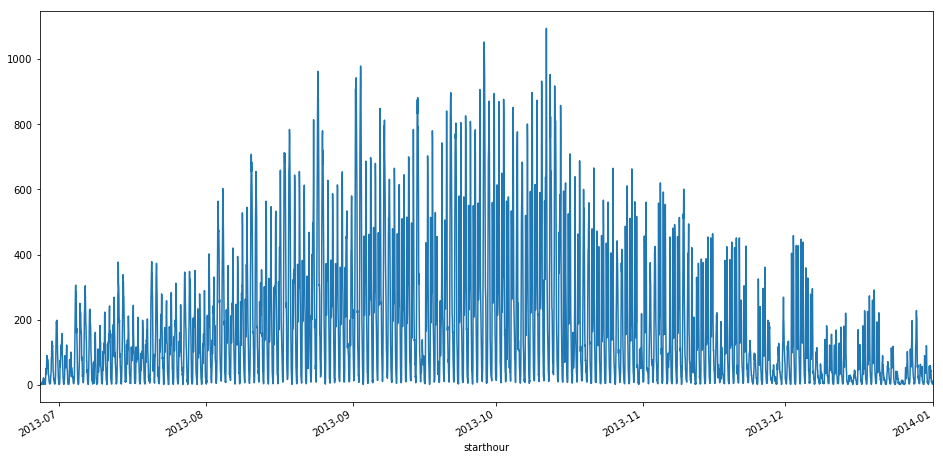

In [68]:
# number of trips started by starthour
divvy.groupby('starthour').size().plot(figsize=(16,8))

#### Distribution of trip duration

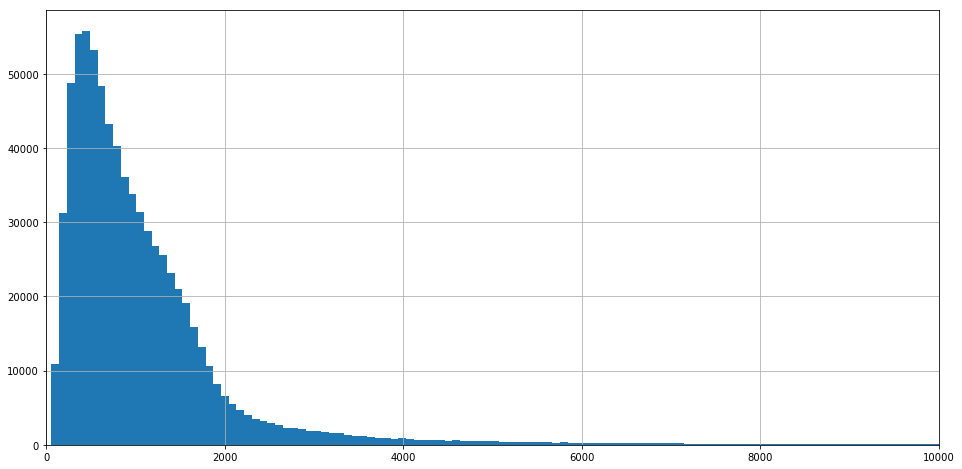

In [69]:
# distribution of tripduration
divvy.tripduration.hist(figsize=(16,8), bins=1000)
plt.xlim(0, 10000);

#### What percentage of Divvy rides are less than 10 minutes? 20 minutes?

Sounds like we need to plot the cumulative distribution of trip duration.

(If someone knows of a better way of doing this, I'd love to hear it).

In [70]:
duration_counts = divvy.tripduration.value_counts()
duration_counts.index.name = 'seconds'
duration_counts.name = 'trips'
duration_counts.head()

seconds
408    712
399    711
346    706
379    701
415    700
Name: trips, dtype: int64

In [71]:
df = duration_counts.reset_index()
df

,seconds,trips
0,408,712
1,399,711
2,346,706
3,379,701
4,415,700
5,410,698
6,446,693
7,364,691
8,369,689
9,390,689


In [74]:
df['minutes'] = df.seconds/60.
df.set_index('minutes', inplace=True)
df.sort_index(inplace=True)
df

,seconds,trips
minutes,,
1.000000,60,68
1.016667,61,78
1.033333,62,65
1.050000,63,67
1.066667,64,78
1.083333,65,78
1.100000,66,82
1.116667,67,60
1.133333,68,73


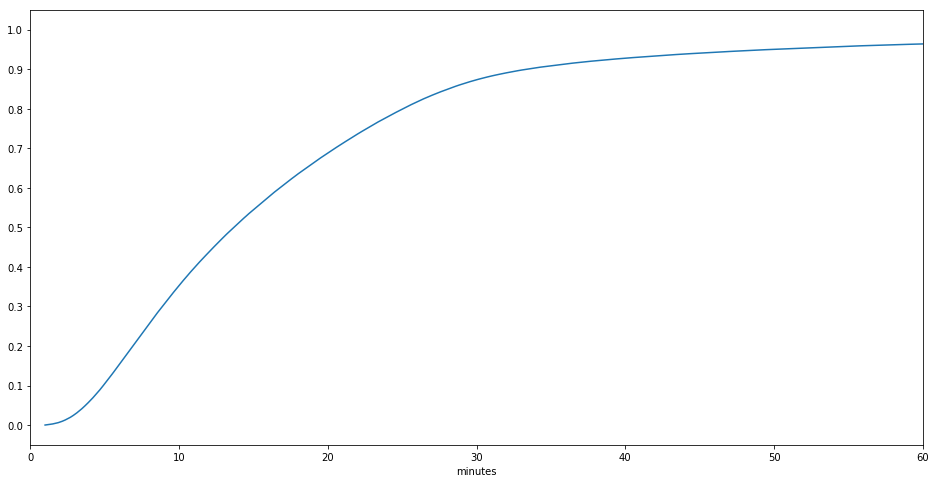

In [76]:
(df.trips.cumsum() / df.trips.sum()).plot(figsize=(16,8))
plt.xlim(0, 60)
plt.yticks(np.arange(0, 1.1, 0.1));
# nice the way it keeps the index as x axis...

#### Number of trips per birth year

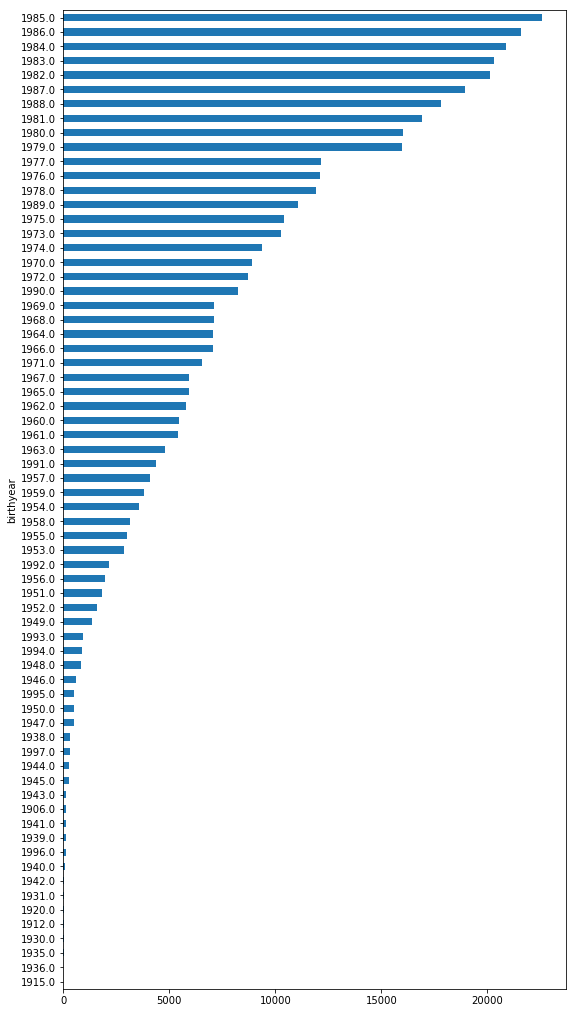

In [78]:
plt.figure(figsize=(9, 18))
divvy.groupby('birthyear').size().sort_values().plot(kind='barh')

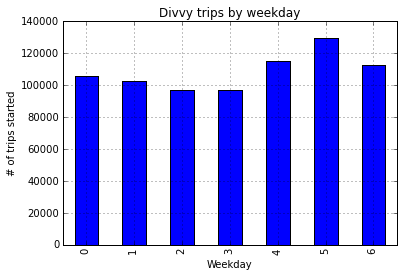

In [48]:
divvy.groupby(divvy['starttime'].apply(lambda d: d.dayofweek))['trip_id'].count().plot(kind='bar')
plt.title('Divvy trips by weekday') # 0 = Monday ...
plt.xlabel('Weekday')
plt.ylabel('# of trips started');

#### Men vs. Women

Plotting multiple lines and subplotting.

In [79]:
divvy['startdate'] = divvy.starthour.apply(lambda d: d.date())
by_gender = divvy.groupby(['startdate', 'gender']).size()

In [80]:
by_gender.head()

startdate   gender
2013-06-27  Female     14
            Male       45
2013-06-28  Female     75
            Male      321
2013-06-29  Female     42
dtype: int64

In [81]:
by_gender.unstack(1).head()

gender,Female,Male
startdate,,
2013-06-27,14.0,45.0
2013-06-28,75.0,321.0
2013-06-29,42.0,163.0
2013-06-30,47.0,180.0
2013-07-01,87.0,449.0


pandas wins here.

In [52]:
# SELECT startdate
#    , COUNT(IF(gender = 'Female', 1, NULL))
#    , COUNT(IF(gender = 'Male', 1, NULL))
# FROM divvy
# GROUP BY startdate
# LIMIT 5;
divvy.groupby(['startdate', 'gender']).size().unstack(1).head()

gender,Female,Male
startdate,,
2013-06-27,14,45
2013-06-28,75,321
2013-06-29,42,163
2013-06-30,47,180
2013-07-01,87,449


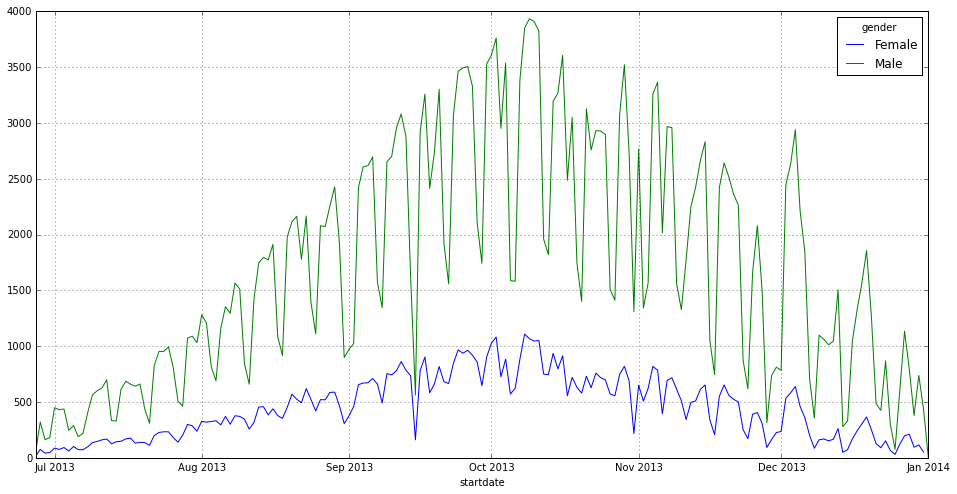

In [53]:
by_gender.unstack(1).plot(figsize=(16,8))

#### Consumer vs Subscriber

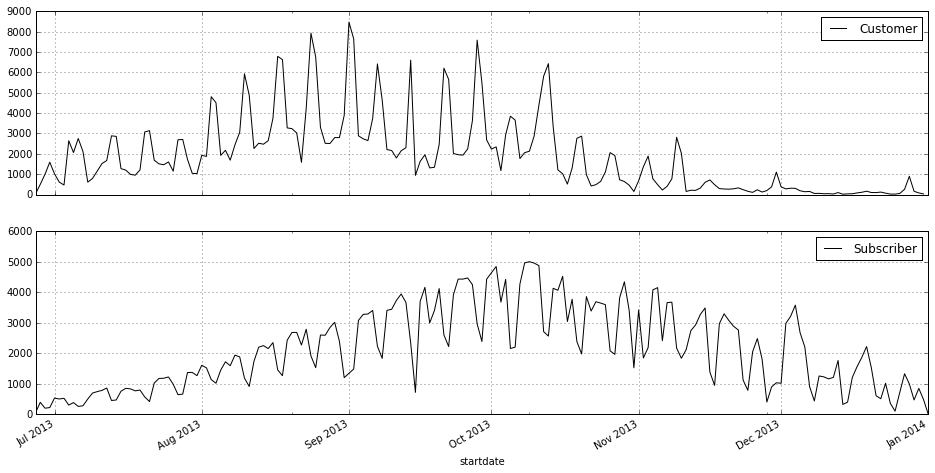

In [54]:
divvy.groupby(['startdate', 'usertype']).size().unstack(1).plot(figsize=(16,8), subplots=True);

#### Trips by weekday hour

In [55]:
weekdays = divvy['starttime'].apply(lambda d: d.dayofweek)
hours = divvy['starttime'].apply(lambda d: d.hour)
by_weekday_hour = divvy.groupby([weekdays, hours])['trip_id'].count()
by_weekday_hour.index.names = ['weekday', 'hour'] # rename MultiIndex

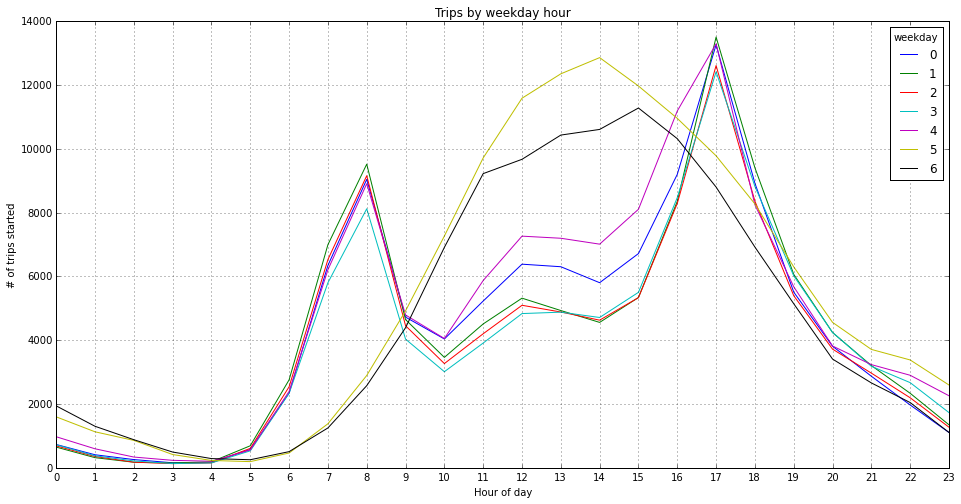

In [56]:
by_weekday_hour.unstack(0).plot(figsize=(16,8))
plt.title('Trips by weekday hour')
plt.ylabel('# of trips started')
plt.xlabel('Hour of day')
plt.xticks(range(24))
plt.xlim(0, 23);

<div align="center">
# Thanks!
## Questions?

### [Greg Reda](http://www.gregreda.com) / [@gjreda](https://twitter.com/gjreda)